# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
    ### STUDENT START ###
    #printing label, associated category, and text example
    for i in range(num_examples):
        print("Label:", train_labels[i], "|", newsgroups_train.target_names[train_labels[i]], "| Text: \n", train_data[i])
        print("-" * 80) #to separate each message example more clearly
    ### STUDENT END ###

P1(5)

Label: 1 | comp.graphics | Text: 
 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--------------------------------------------------------------------------------
Label: 3 | talk.religion.misc | Text: 
 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 199

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [4]:
def P2():
    ### STUDENT START ###
    
    #-----Word Unigram Feature Vectors of Training Data-----
    print("For Word Unigram Feature Vectors: \n", "-" * 80)
    word_uni_vectorizer = CountVectorizer()
    vtrain_word_uni = word_uni_vectorizer.fit_transform(train_data)
    print("   Size of vocabulary:", len(word_uni_vectorizer.get_feature_names()))
    print("   Average num of non-zero features per example:", vtrain_word_uni.nnz / vtrain_word_uni.shape[0])
    print("   Fraction of non-zero entries in the matrix:", vtrain_word_uni.nnz / (vtrain_word_uni.shape[0] * vtrain_word_uni.shape[1]))
    print("   0th feature string:", word_uni_vectorizer.get_feature_names()[0])
    print("   Last feature string:", word_uni_vectorizer.get_feature_names()[-1])

    #-----Word Unigram Feature Vectors Using Own Vocabulary-----
    print("\nFor Word Unigram Feature Vectors Using Own Vocabulary: \n", "-" * 80)
    vocab = ["atheism", "graphics", "space", "religion"]
    vocab_vectorizer = CountVectorizer(vocabulary=vocab)
    vtrain_vocab = vocab_vectorizer.transform(train_data)
    print("   Size of vocabulary:", len(vocab_vectorizer.get_feature_names()))
    print("   Average num of non-zero features per example:", vtrain_vocab.nnz / vtrain_vocab.shape[0])

    #-----Character Bigram Feature Vectors-----
    print("\nFor Character Bigram Feature Vectors: \n", "-" * 80)
    char_bi_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,2))
    vtrain_char_bi = char_bi_vectorizer.fit_transform(train_data)
    print("   Size of vocabulary:", len(char_bi_vectorizer.get_feature_names()))

    #-----Character Trigram Feature Vectors-----
    print("\nFor Character Trigram Feature Vectors: \n", "-" * 80)
    char_tri_vectorizer = CountVectorizer(analyzer='char', ngram_range=(3,3))
    vtrain_char_tri = char_tri_vectorizer.fit_transform(train_data)
    print("   Size of vocabulary:", len(char_tri_vectorizer.get_feature_names()))

    #-----Word Unigram Feature Vectors for Words in 10 or more Documents-----
    print("\nFor Word Unigram Feature Vectors for Words in 10 or more Documents: \n", "-" * 80)
    ten_vectorizer = CountVectorizer(min_df=10)
    vtrain_ten = ten_vectorizer.fit_transform(train_data)
    print("   Size of vocabulary:", len(ten_vectorizer.get_feature_names()))

    #-----Word Unigram Feature Vectors of Dev Data-----
    print("\nFor Feature Vectors of Dev Data: \n", "-" * 80)
    word_train_vectorizer = CountVectorizer()
    vtrain_word = word_train_vectorizer.fit_transform(train_data)
    word_dev_vectorizer = CountVectorizer()
    vdev_word = word_dev_vectorizer.fit_transform(dev_data)
    print("   Fraction of words in dev vocabulary missing from training vocabulary:",len(set(word_dev_vectorizer.get_feature_names()) - set(word_train_vectorizer.get_feature_names())) / len(word_dev_vectorizer.get_feature_names()))
    
    ### STUDENT END ###

P2()

For Word Unigram Feature Vectors: 
 --------------------------------------------------------------------------------
   Size of vocabulary: 26879
   Average num of non-zero features per example: 96.70599803343165
   Fraction of non-zero entries in the matrix: 0.0035978272269590263
   0th feature string: 00
   Last feature string: zyxel

For Word Unigram Feature Vectors Using Own Vocabulary: 
 --------------------------------------------------------------------------------
   Size of vocabulary: 4
   Average num of non-zero features per example: 0.26843657817109146

For Character Bigram Feature Vectors: 
 --------------------------------------------------------------------------------
   Size of vocabulary: 3291

For Character Trigram Feature Vectors: 
 --------------------------------------------------------------------------------
   Size of vocabulary: 32187

For Word Unigram Feature Vectors for Words in 10 or more Documents: 
 --------------------------------------------------------

### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

k-Nearest Neighbores models:
 --------------------------------------------------------------------------------
For 1-NN model, F1 score: 0.3805030018531525
For 2-NN model, F1 score: 0.38054212404441684
For 3-NN model, F1 score: 0.4084150225437623
For 4-NN model, F1 score: 0.4031227993847515
For 5-NN model, F1 score: 0.4287607236218357
For 6-NN model, F1 score: 0.4466650540867595
For 7-NN model, F1 score: 0.45047910006117586
For 8-NN model, F1 score: 0.44698358117081094
For 9-NN model, F1 score: 0.4365666176198027
For 10-NN model, F1 score: 0.4278502905941064
For 20-NN model, F1 score: 0.4243419588207676
For 50-NN model, F1 score: 0.4176318433511905
For 100-NN model, F1 score: 0.4422400339224965
For 200-NN model, F1 score: 0.4180556621195381
For 500-NN model, F1 score: 0.3336418826736761
Optimal model was 7-NN, with F1 score of 0.45047910006117586

Multinomial Naive Bayes models:
 --------------------------------------------------------------------------------
Using alpha: 0.000100, F1 

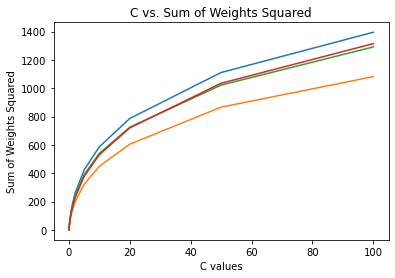

In [5]:
def P3():
    ### STUDENT START ###
    
    #-----Transform training and dev data-----
    vectorizer = CountVectorizer()
    vtrain = vectorizer.fit_transform(train_data)
    vdev = vectorizer.transform(dev_data)

    #-----Build and evaluate k-NN models-----
    print("k-Nearest Neighbores models:\n", "-" * 80)
    k_values = [1,2,3,4,5,6,7,8,9,10,20,50,100,200,500]
    f1_NN = [] #tracking f1 scores
    for k in k_values: #iterate through models
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(vtrain, train_labels)
            dev_pred_labels = model.predict(vdev)
            f1_NN.append(metrics.f1_score(dev_labels, dev_pred_labels, average='weighted'))
            print("For %d-NN model, F1 score:" % k, metrics.f1_score(dev_labels, dev_pred_labels, average='weighted'))
    print("Optimal model was %d-NN, with F1 score of" % k_values[f1_NN.index(max(f1_NN))], max(f1_NN)) #print optimal model

    #-----Build and evaluate Naive Bayes models-----
    print("\nMultinomial Naive Bayes models:\n", "-" * 80)
    alphas = [0.0001,0.001, 0.01, 0.1, 0.2, 0.5,1,2,5,10,20,50,100]
    f1_NB =[]
    for a in alphas:
        nb_model = MultinomialNB(alpha=a)
        nb_model.fit(vtrain, train_labels)
        nb_pred = nb_model.predict(vdev)
        f1_NB.append(metrics.f1_score(dev_labels, nb_pred, average='weighted'))
        print("Using alpha: %f, F1 score:" % a, metrics.f1_score(dev_labels, nb_pred, average='weighted'))
    print("Optimal alpha was %f, with F1 score of" % alphas[f1_NB.index(max(f1_NB))], max(f1_NB))

    #-----Build and evaluate Logistic Regression models-----
    print("\nLogistic Regression models:\n", "-" * 80)
    C_values = [0.0001,0.001, 0.01, 0.1, 0.2, 0.5,1,2,5,10,20,50,100]
    f1_log =[]
    weights = [[],[],[],[]] #keeping track of sum of squared weights for each topic, per C value

    for c in C_values:
        log_model = LogisticRegression(C=c, solver="liblinear", multi_class="auto")
        log_model.fit(vtrain, train_labels)
        log_pred = log_model.predict(vdev)
        f1_log.append(metrics.f1_score(dev_labels, log_pred, average='weighted'))
        print("Using C: %f, F1 score:" % c, metrics.f1_score(dev_labels, log_pred, average='weighted'))
        for i in range(4):
            weights[i].append(sum(log_model.coef_[i]**2))
            print("\t",newsgroups_train.target_names[i], "| Sum(Weights^2):", sum(log_model.coef_[i]**2))
    print("Optimal C was %f, with F1 score of" % C_values[f1_log.index(max(f1_log))], max(f1_log))

    #-----Plotting Relationship between C and sum of weights squared-----
    for i in range(4):
        plt.plot(C_values, weights[i])
    plt.title("C vs. Sum of Weights Squared")
    plt.xlabel("C values")
    plt.ylabel("Sum of Weights Squared")
    plt.show()
    ### STUDENT END ###

P3()

ANSWER: k-Nearest Neighbors does not work well for this problem because the underlying idea assumes that similar feature vectors have similar labels. However, in our bag of words, there are a lot of words that may appear many times between documents, such as "a, or, but, and," which implies similarity in labels for k-NN but in reality these words do not contribute much to classifying the context of the document. A few specific terms within documents contribute a much higher probability of classifying the documents into their correct categories. This is likely why logistic regression does not perform as well as Naive Bayes in this problem. Naive Bayes is a generative model that performs better for our data because each document has very different feature vectors from another documents feature vectors. Logistic regression is a discrimitive model that does well to draw decision boundaries for classification, but since our feature vectors an so inconsitent between documents, the log-linear boundaries are less reliable when applied to new data.

We see from the graph above of C values vs. sum of squared weights that they have a logarithmic relationship. Sum of squared weights increase logrithmically as C increases.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

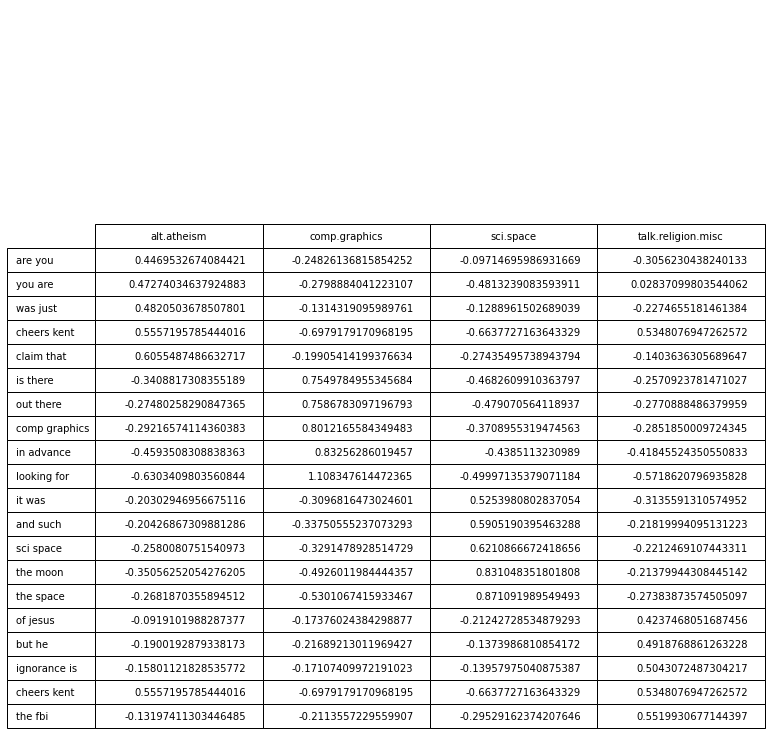

In [6]:
def P4():
    ### STUDENT START ###
    
    # tranform training data
    vectorizer = CountVectorizer(ngram_range=(2,2))
    vtrain = vectorizer.fit_transform(train_data)

    # fit logistic regression model
    log_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    log_model.fit(vtrain, train_labels)

    # get indices of top 5 largest weights for features in each topic
    top_indices = np.ndarray.flatten(np.argsort(log_model.coef_)[:,-5:])

    # get weights at each index for all topics
    top_weights = np.column_stack((np.take(log_model.coef_[0], top_indices),
                           np.take(log_model.coef_[1], top_indices),
                           np.take(log_model.coef_[2], top_indices),
                           np.take(log_model.coef_[3], top_indices)))

    # create and format table
    table = plt.table(cellText = top_weights,
                      colLabels = newsgroups_train.target_names,
                      rowLabels = np.take(vectorizer.get_feature_names(), top_indices))
    table.scale(2,2)
    plt.axis('off')
    plt.show()

    ### STUDENT END ###

P4()

ANSWER: I found it surprising that for 'alt.atheism', the bigram word features with the largest weights seemed very general, such as "are you", "you are", and "was just". These do not seem to have any keywords or specificity for atheism. Comparatively, the other categories seemed to have bigrams that were more expected for classification. I also found it surprising that "cheers kent" appeared as a top weighted bigram for both 'alt.atheism' and 'talk.religion.misc'. I'm not familiar with the term and am surprised that it is weighted so heavily for classification of those categories.

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [7]:
def better_preprocessor(s):
    ### STUDENT START ###
    s = s.lower() # lowercase letters
    s = re.sub(r'\d{5,}',' NUMBER ',s) # token 5 or more digits
    s = re.sub(r'\d{4}',' YEAR ',s) # token possible years
    s = re.sub(r'\r?\n|\r', ' ',s) # remove line beginning and end
    s = s.replace(" won't ", ' will not ').replace("n't ", ' not ') \
         .replace("'ll ", ' will ').replace("'d ", ' would ') # expand contractions
    s = re.sub(r'[,\/.!?)>;%$]', ' ', s) # drop punctuation

    trunc_s = [] # truncate long words
    s = s.replace(' fbi ', "FBII") # annotate important short words to not be dropped
    s = s.replace(' god ', 'GODD')
    for word in s.split():
        if len(word) > 3:
              trunc_s.append(word[:4])
    return " ".join(trunc_s)

    s = re.sub(r'\s{2,}',' ',s) # eliminate multiple whitespaces
    return s
    ### STUDENT END ###

def P5():
    ### STUDENT START ###
    
    #----------Without Preprocessing----------
    print("\nWithout Preprocessing:\n", "-" * 80)

    # transforming with no preprocessing
    vectorizer = CountVectorizer()
    vtrain = vectorizer.fit_transform(train_data)
    vdev = vectorizer.transform(dev_data)

    # build and evaluate logistic regression model
    log_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    log_model.fit(vtrain, train_labels)
    log_pred = log_model.predict(vdev)
    print("F1 score without preprocessing:", metrics.f1_score(dev_labels, log_pred, average='weighted'))
    print("Size of dictionary:", len(vectorizer.get_feature_names()))

    #----------With Better Preprocessor----------
    print("\nWith Better Preprocessing:\n", "-" * 80)

    # transforming with better preprocessing
    b_vectorizer = CountVectorizer(preprocessor=better_preprocessor)
    b_vtrain = b_vectorizer.fit_transform(train_data)
    b_vdev = b_vectorizer.transform(dev_data)

    # build and evaluate logistic regression model
    b_log_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    b_log_model.fit(b_vtrain, train_labels)
    b_log_pred = b_log_model.predict(b_vdev)
    print("F1 score with better preprocessing:", metrics.f1_score(dev_labels, b_log_pred, average='weighted'))
    print("Size of dictionary:", len(b_vectorizer.get_feature_names()))
    print("\nVocabulary size reduced by", (len(vectorizer.get_feature_names())-len(b_vectorizer.get_feature_names())), "features.")
    print("F1 improved by", metrics.f1_score(dev_labels, b_log_pred, average='weighted') - metrics.f1_score(dev_labels, log_pred, average='weighted'))
    ### STUDENT END ###

P5()


Without Preprocessing:
 --------------------------------------------------------------------------------
F1 score without preprocessing: 0.710072965652832
Size of dictionary: 26879

With Better Preprocessing:
 --------------------------------------------------------------------------------
F1 score with better preprocessing: 0.7310144265431718
Size of dictionary: 10045

Vocabulary size reduced by 16834 features.
F1 improved by 0.02094146089033988


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

Using C: 0.002000, F1 score: 0.24563565441578253 , Size of vocabulary: 1
Using C: 0.003000, F1 score: 0.35314419653171336 , Size of vocabulary: 4
Using C: 0.006000, F1 score: 0.42514263009086667 , Size of vocabulary: 9
Using C: 0.010000, F1 score: 0.4542955223098207 , Size of vocabulary: 13
Using C: 0.020000, F1 score: 0.5791872529221823 , Size of vocabulary: 33
Using C: 0.050000, F1 score: 0.6341761191567822 , Size of vocabulary: 107
Using C: 0.070000, F1 score: 0.649882606115348 , Size of vocabulary: 133
Using C: 0.100000, F1 score: 0.6958497676371289 , Size of vocabulary: 199
Using C: 0.200000, F1 score: 0.677529079106367 , Size of vocabulary: 329
Using C: 0.300000, F1 score: 0.6788325918823316 , Size of vocabulary: 460
Using C: 0.400000, F1 score: 0.6864887396872821 , Size of vocabulary: 558
Using C: 0.500000, F1 score: 0.6831043603563894 , Size of vocabulary: 659
Using C: 1.000000, F1 score: 0.693996641132279 , Size of vocabulary: 937


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Using C: 2.000000, F1 score: 0.7038304778207992 , Size of vocabulary: 1410
Using C: 5.000000, F1 score: 0.6809607331748294 , Size of vocabulary: 2084
Using C: 10.000000, F1 score: 0.700161641135383 , Size of vocabulary: 2887
Using C: 20.000000, F1 score: 0.6960465994159889 , Size of vocabulary: 3346
Using C: 50.000000, F1 score: 0.6965881141598173 , Size of vocabulary: 5271
Using C: 100.000000, F1 score: 0.689363971686224 , Size of vocabulary: 6750
Using C: 200.000000, F1 score: 0.70487328809098 , Size of vocabulary: 11796


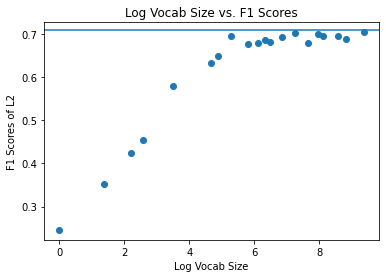

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ### STUDENT START ###
    # fit L1 logistic regression model
    log_vocab_size = []
    f1_scores = []
    C_values = [0.002, 0.003, 0.006, 0.01, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5 ,1, 2, 5, 10, 20, 50, 100, 200]

    for c in C_values:
        vectorizer = CountVectorizer()
        vtrain = vectorizer.fit_transform(train_data)
        vdev = vectorizer.transform(dev_data)

        L1_model = LogisticRegression(C=c, solver="liblinear", multi_class="auto", penalty="l1", tol = 0.015)
        L1_model.fit(vtrain, train_labels)

        positive_coef_indices = set(np.where(L1_model.coef_ > 0)[1])
        red_vocab = np.take(vectorizer.get_feature_names(), list(positive_coef_indices))

        red_vectorizer = CountVectorizer(vocabulary=red_vocab)
        red_vtrain = red_vectorizer.fit_transform(train_data)
        red_vdev = red_vectorizer.transform(dev_data)

        L2_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty="l2", tol = 0.015)
        L2_model.fit(red_vtrain, train_labels)
        pred_L2 = L2_model.predict(red_vdev)
        f1_scores.append(metrics.f1_score(dev_labels, pred_L2, average='weighted'))
        print("Using C: %f, F1 score:" % c, metrics.f1_score(dev_labels, pred_L2, average='weighted'),", Size of vocabulary:", len(red_vectorizer.get_feature_names()))
        log_vocab_size.append(len(red_vectorizer.get_feature_names()))

    plt.scatter(np.log(log_vocab_size), f1_scores)
    plt.title("Log Vocab Size vs. F1 Scores")
    plt.xlabel("Log Vocab Size")
    plt.ylabel("F1 Scores of L2")
    plt.axhline(0.71, label="L2 Baseline")
    plt.show()
    ### STUDENT END ###

P6()

ANSWER: As reduced log vocab size increases from 1, the models also increasing improve in performance and have higher F1 scores. However, at around vocabulary size 200, they reach similar performance levels as the models based on full vocabulary. Increasing vocabulary size beyond 200 does not affect the model's performance very much (with minor fluctuations), and the models based on reduced vocabulary sizes continue to perform at similar levels to the model based on full vocabulary size.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [9]:
def P7():
    ### STUDENT START ###
# transform training and dev data
    vectorizer = TfidfVectorizer()
    vtrain = vectorizer.fit_transform(train_data)
    vdev = vectorizer.transform(dev_data)
    
# create and fit the logistic regression model
    log_model = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    log_model.fit(vtrain, train_labels)
    log_pred = log_model.predict(vdev)

# iterate and track the predicted probabilities of correct labels
    correct_prob = []
    for i in range(len(dev_labels)):
        correct_prob.append(log_model.predict_proba(vdev)[i][dev_labels[i]])

# find the indices with the 3 highest R ratios
    max_ratios_indices = np.argsort(np.amax(log_model.predict_proba(vdev), axis=1) / correct_prob)[-3:]

# print documents and associated info
    for i in range(3):
        print("R ratio:",np.take((np.amax(log_model.predict_proba(vdev), axis=1) / correct_prob), max_ratios_indices)[i])
        print("   predicted probabilites:",np.take(log_model.predict_proba(vdev), max_ratios_indices, axis=0)[i])
        print("   predicted probability of correct label:",np.take(correct_prob, max_ratios_indices)[i])
        print("\n",np.take(dev_data, max_ratios_indices)[i],"\n", "-"*80)

    ### STUDENT END ###

P7()

R ratio: 287.1791609666149
   predicted probabilites: [0.0024217  0.02007096 0.282045   0.69546234]
   predicted probability of correct label: 0.0024217019701806065

 
The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...
 
 --------------------------------------------------------------------------------
R ratio: 325.004118137223
   predicted probabilites: [0.00291047 0.97974632 0.01432864 0.00301457]
   predicted probability of correct label: 0.0030145658733948264

 Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 
 --------------------------------------------------------------------------------
R ratio: 929.3580836395557
   predicted probabilites: [0.00196563 0.99371994 0.00324517 0.00106925]
   predicted probability of correct label: 0.0010692541012846347

 I am pleased to announce that a *revised version* of _T

ANSWER: CountVectorizer uses a count matrix for the feature vectors, while TfidVectorizor transforms the count matrix to a normalized tf or tf-idf representation, effectively normalizing the count frequencies.

The R ratio describes by how much the model predicted the wrong class. If it classified the document correctly, the R ratio should be 1. When it is wrong, the ratio is > 1. The magnitude of the R ratio tells us how much the model thought it was the wrong class over the right class. From these 3 documents with the highest R ratios, we can see that it very confidently picks 'comp.graphics' when it should be classifying the document as 'talk.religion.misc'. One possible solution would be to increase the weight of the unique features so that they are more recognizable as 'talk.religion.misc'. I can see from the text above that both misclassified documents mention the Book of Mormon. We could change our preprocessor to repeat these words when ever it encounters them so that they gain more weight in the model coefficients.

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [10]:
def better_mormon_preprocessor(s):
    ### STUDENT START ###
    s = s.lower() # lowercase letters
    s = re.sub(r'\d{5,}',' NUMBER ',s) # token 5 or more digits
    s = re.sub(r'\d{4}',' YEAR ',s) # token possible years
    s = re.sub(r'\r?\n|\r', ' ',s) # remove line beginning and end
    s = s.replace(" won't ", ' will not ').replace("n't ", ' not ') \
         .replace("'ll ", ' will ').replace("'d ", ' would ') # expand contractions
    s = re.sub(r'[,\/.!?)>;%$]', ' ', s) # drop punctuation

    trunc_s = [] # truncate long words
    s = s.replace(' fbi ', "FBII") # annotate important short words to not be dropped
    s = s.replace(' god ', 'GODD')
    for i in range(4):
        s = s.replace(' mormon ', " mormon mormon ")
    for word in s.split():
        if len(word) > 3:
              trunc_s.append(word[:4])
    return " ".join(trunc_s)

    s = re.sub(r'\s{2,}',' ',s) # eliminate multiple whitespaces
    return s
    ### STUDENT END ###

def P8():
    ### STUDENT START ###
# transform training and dev data
    vectorizer = TfidfVectorizer(preprocessor=better_mormon_preprocessor)
    vtrain = vectorizer.fit_transform(train_data)
    vdev = vectorizer.transform(dev_data)
    
# create and fit the logistic regression model
    log_model = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    log_model.fit(vtrain, train_labels)
    log_pred = log_model.predict(vdev)

# iterate and track the predicted probabilities of correct labels
    correct_prob = []
    for i in range(len(dev_labels)):
        correct_prob.append(log_model.predict_proba(vdev)[i][dev_labels[i]])

# find the indices with the 3 highest R ratios
    max_ratios_indices = np.argsort(np.amax(log_model.predict_proba(vdev), axis=1) / correct_prob)[-3:]

# print documents and associated info
    for i in range(3):
        print("R ratio:",np.take((np.amax(log_model.predict_proba(vdev), axis=1) / correct_prob), max_ratios_indices)[i])
        print("   predicted probabilites:",np.take(log_model.predict_proba(vdev), max_ratios_indices, axis=0)[i])
        print("   predicted probability of correct label:",np.take(correct_prob, max_ratios_indices)[i])
        print("\n",np.take(dev_data, max_ratios_indices)[i],"\n", "-"*80)

    ### STUDENT END ###

P8()

R ratio: 214.69819855906644
   predicted probabilites: [0.00458894 0.00873288 0.00144074 0.98523744]
   predicted probability of correct label: 0.004588941332452498

 With the Southern Baptist Convention convening this June to consider
the charges that Freemasonry is incompatible with christianity, I thought
the following quotes by Mr. James Holly, the Anti-Masonic Flag Carrier,
would amuse you all...

     The following passages are exact quotes from "The Southern 
Baptist Convention and Freemasonry" by James L. Holly, M.D., President
of Mission and Ministry To Men, Inc., 550 N 10th St., Beaumont, TX 
77706. 
 
     The inside cover of the book states: "Mission & Ministry to Men, 
Inc. hereby grants permission for the reproduction of part or all of 
this booklet with two provisions: one, the material is not changed and
two, the source is identified." I have followed these provisions. 
  
     "Freemasonry is one of the allies of the Devil" Page iv. 
 
     "The issue here is not moder

Using my suggestion from P7, we adjusted the weight of the feature "mormon" using the preprocessor and the top 3 highest R ratios no longer contain the documents misclassifying 'talk.religion.misc' as 'comp.graphics'. However, we see now in our new logistic regression model that the most misclassified documents are misclassifying 'alt.atheism' as 'talk.religion.misc'.